<a href="https://colab.research.google.com/github/sdp2706/reinforcement-learning-/blob/main/Content_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

numpy for numerical operations and random number generation, and matplotlib.pyplot for creating plots.

In [ ]:
# Create a simulated dataset
num_users = 100
num_articles = 10
article_ctr = np.random.rand(num_articles)  # CTR for each article
user_preferences = np.random.rand(num_users, num_articles)

1. **num_users** is set to 100, representing **the number of users in the dataset**.
2. **num_articles** is set to 10, indicating **the number of articles (or items) available for recommendation.**
3. **article_ctr** is an array that **stores Click-Through Rate** (CTR) values for each article. These CTR values are **generated randomly** using **np.random.rand(num_articles)**, representing the probability that a user will click on each article.
4. **user_preferences** is a 2D array that represents the initial user preferences for each article. These preferences are also generated randomly for each user and article combination.

In [ ]:
# Epsilon-Greedy Algorithm
def epsilon_greedy(user_id, num_trials, epsilon):
    selected_articles = []
    rewards = []

    for _ in range(num_trials):
        if np.random.random() < epsilon:
            selected_arm = np.random.choice(num_articles)
        else:
            selected_arm = np.argmax(user_preferences[user_id])

        # Simulate user interaction based on CTR
        if np.random.random() < article_ctr[selected_arm]:
            reward = 1  # User clicked on the article
        else:
            reward = 0  # User did not click on the article

        selected_articles.append(selected_arm)
        rewards.append(reward)

    return selected_articles, rewards

This section defines the Epsilon-Greedy algorithm:

1. **epsilon_greedy** is a function that takes **user_id, num_trials, and epsilon** as inputs.
2. Inside a loop that runs for **num_trials**, the algorithm decides whether to **explore or exploit**. With probability **epsilon**, it **explores by randomly selecting an article** (selected_arm) **using np.random.choice(num_articles)**. Otherwise, it **exploits** by selecting the **article with the highest preference value** for the user **(np.argmax(user_preferences[user_id]))**.
3. **User interaction is simulated based on CTR values**: If a random value is less than the CTR of the selected article, a reward of 1 is assigned, indicating that the user clicked on the article. Otherwise, a reward of 0 is assigned.
4. The selected article and reward are appended to lists (selected_articles and rewards).

In [ ]:
# UCB Algorithm
def ucb(user_id, num_trials):
    selected_articles = []
    rewards = []
    num_selections = np.zeros(num_articles)
    estimated_rewards = np.zeros(num_articles)

    for t in range(1, num_trials + 1):
        if t <= num_articles:
            selected_arm = t - 1
        else:
            exploration_factor = np.sqrt(np.log(t) / num_selections)
            ucb_scores = estimated_rewards + exploration_factor
            selected_arm = np.argmax(ucb_scores)

        # Simulate user interaction based on CTR
        if np.random.random() < article_ctr[selected_arm]:
            reward = 1  # User clicked on the article
        else:
            reward = 0  # User did not click on the article

        num_selections[selected_arm] += 1
        estimated_rewards[selected_arm] += (reward - estimated_rewards[selected_arm]) / num_selections[selected_arm]

        selected_articles.append(selected_arm)
        rewards.append(reward)

    return selected_articles, rewards

This section defines the UCB (Upper Confidence Bound) algorithm:

1. **ucb** is a function that takes **user_id and num_trials** as inputs.
2. Inside a loop, the **algorithm selects articles** based on a **combination of exploration and exploitation**.
3. **Initially**, it selects the **first num_articles** arms (articles) **sequentially**. After that, it **calculates** an **exploration factor** and **UCB score**s for each arm. The arm with the **highest UCB score** is selected for recommendation.
4. User interaction is simulated based on CTR values in a similar way as in the Epsilon-Greedy algorithm.
5. The number of selections and estimated rewards for each arm are updated based on the observed rewards.
6. The selected article and reward are appended to lists (selected_articles and rewards).

In [ ]:
# Thompson Sampling Algorithm
def thompson_sampling(user_id, num_trials):
    selected_articles = []
    rewards = []
    num_successes = np.zeros(num_articles)
    num_failures = np.zeros(num_articles)

    for _ in range(num_trials):
        sampled_successes = num_successes + 1
        sampled_failures = num_failures + 1
        sampled_rewards = np.random.beta(sampled_successes, sampled_failures)
        selected_arm = np.argmax(sampled_rewards)

        # Simulate user interaction based on CTR
        if np.random.random() < article_ctr[selected_arm]:
            reward = 1  # User clicked on the article
        else:
            reward = 0  # User did not click on the article

        if reward == 1:
            num_successes[selected_arm] += 1
        else:
            num_failures[selected_arm] += 1

        selected_articles.append(selected_arm)
        rewards.append(reward)

    return selected_articles, rewards

This section defines the Thompson Sampling algorithm:

1. **thompson_sampling** is a function that takes **user_id** and **num_trials** as inputs.
2. Inside a loop, the algorithm **samples success** and **failure counts** for each arm based on the **observed data**.
3. It then samples rewards from a beta distribution based on the sampled success and failure counts and selects the arm with the highest sampled reward.
4. **User interaction** is simulated based on **CTR values** as in the previous algorithms, and the **success** and **failure** counts are updated accordingly.
5. The selected article and reward are appended to lists (selected_articles and rewards).

In [ ]:
# Simulate user interactions and recommendations for each strategy
num_trials = 1000
user_id = 0
epsilon = 0.1

eg_selected_articles, eg_rewards = epsilon_greedy(user_id, num_trials, epsilon)
ucb_selected_articles, ucb_rewards = ucb(user_id, num_trials)
ts_selected_articles, ts_rewards = thompson_sampling(user_id, num_trials)

1. **num_trials** specifies the number of trials or interactions.
2. **user_id** represents the user for whom recommendations are being made.
3. **epsilon** is the exploration parameter used in the Epsilon-Greedy algorithm.

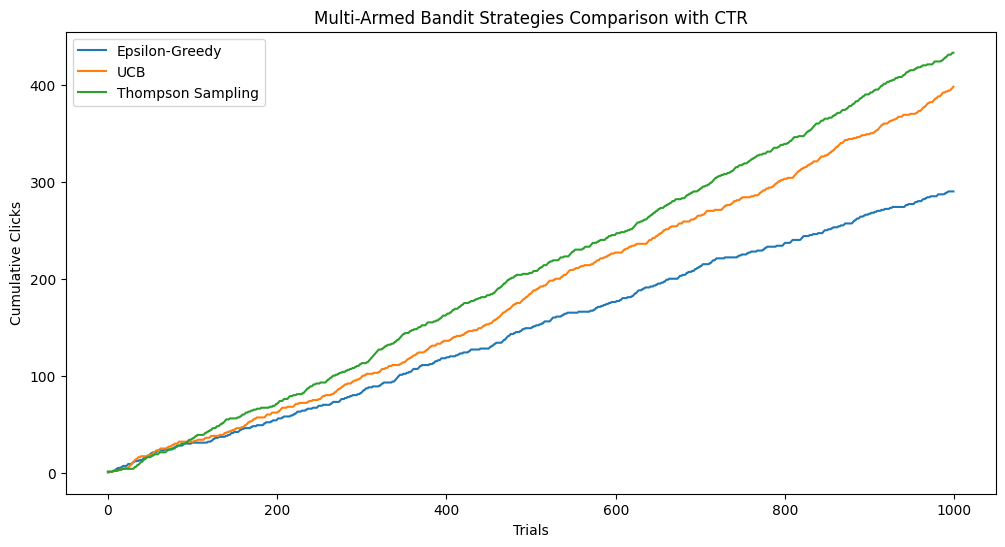

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(eg_rewards), label='Epsilon-Greedy')
plt.plot(np.cumsum(ucb_rewards), label='UCB')
plt.plot(np.cumsum(ts_rewards), label='Thompson Sampling')
plt.xlabel('Trials')
plt.ylabel('Cumulative Clicks')
plt.legend()
plt.title('Multi-Armed Bandit Strategies Comparison with CTR')
plt.show()

This section creates a plot using matplotlib to visualize the cumulative clicks